In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator # peut etre supr
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

import pickle

In [17]:
pickle_in = open("featuresCh.pickle","rb")
X = pickle.load(pickle_in)

X.shape

pickle_in = open("labelsCh.pickle","rb")
y = pickle.load(pickle_in)
y = np.array(y)

print(y.shape)
print(X.shape)

(9050,)
(9050, 224, 224, 3)


Text(0.5, 1.0, 'Troncons_C_Other')

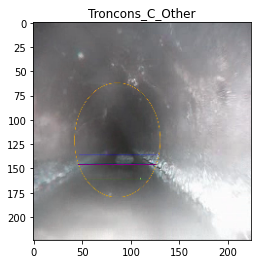

In [18]:
CATEGORIES = ["Troncons_C_Other","Troncons_C0_Only"]

plt.figure()
plt.imshow(X[2007])
plt.title(CATEGORIES[y[2007]])

In [19]:
# création du jeu de test et d'entraînement 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

# création du jeu de validation

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size = 0.10, random_state = 1) # 0.25x0.8 = 0.2

X_train = X_train.astype("float32")/127.5 -1
X_test = X_test.astype("float32")/127.5 -1
X_val = X_val.astype("float32")/127.5 -1

X_train.shape

(5701, 224, 224, 3)

In [20]:
import gradio as gr 
import cv2

In [21]:
model = tf.keras.models.load_model("charge1")


In [28]:
def predict_img(img):
    
    img3d = cv2.resize(img,(224, 224))
    prediction = model.predict(img3d)[0]
    return{CATEGORIES[i]: float(prediction[i]) for i in range (2)}

In [32]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_img, inputs= image, outputs = label,capture_session = True, share = True).launch(debug='True') 


C:\Users\Sylvain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Sylvain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Sylvain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Sylvain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p

ValueError: When running in Google Colab or when localhost is not accessible, a shareable link must be created. Please set share=True.

In [28]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3),
                                              include_top = False,
                                              weights = 'imagenet'
                                              )

In [29]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [64]:


model= tf.keras.Sequential()

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.35))  # Pour effacer le poids de certains neuronnes avec une prob p . 
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation ='relu'))

model.add(tf.keras.layers.Dense(1,activation ='sigmoid'))



In [65]:
base_model.trainable= False 


In [66]:
model = tf.keras.Sequential([
    base_model,
    model,
])



In [67]:
base_learning_rate = 0.0001
# base_learning_rate = 0.00045
model.compile(optimizer = tf.keras.optimizers.Adam(lr = base_learning_rate), 
               loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])



In [68]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 sequential_8 (Sequential)   (None, 1)                 82049     
                                                                 
Total params: 2,340,033
Trainable params: 82,049
Non-trainable params: 2,257,984
_________________________________________________________________


In [73]:
history = model.fit(X_train,
                    y_train, 
                    batch_size= 50,
                    epochs = 30, 
                    validation_data =(X_val,y_val),
                    )

Epoch 1/30
115/115 [==============================] - 120s 1s/step - loss: 0.2935 - accuracy: 0.8758 - val_loss: 0.3064 - val_accuracy: 0.8722
Epoch 2/30
115/115 [==============================] - 120s 1s/step - loss: 0.2849 - accuracy: 0.8821 - val_loss: 0.3068 - val_accuracy: 0.8707
Epoch 3/30
115/115 [==============================] - 127s 1s/step - loss: 0.2773 - accuracy: 0.8842 - val_loss: 0.3054 - val_accuracy: 0.8628
Epoch 4/30
115/115 [==============================] - 136s 1s/step - loss: 0.2673 - accuracy: 0.8897 - val_loss: 0.3270 - val_accuracy: 0.8659
Epoch 5/30
115/115 [==============================] - 131s 1s/step - loss: 0.2783 - accuracy: 0.8807 - val_loss: 0.3080 - val_accuracy: 0.8612
Epoch 6/30
115/115 [==============================] - 122s 1s/step - loss: 0.2752 - accuracy: 0.8820 - val_loss: 0.3121 - val_accuracy: 0.8659
Epoch 7/30
115/115 [==============================] - 119s 1s/step - loss: 0.2720 - accuracy: 0.8879 - val_loss: 0.3079 - val_accuracy: 0.8659

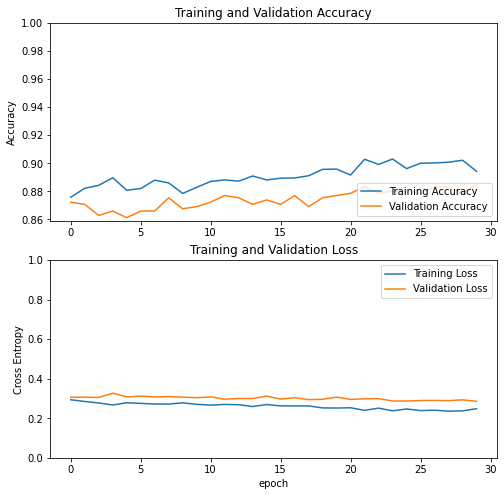

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [10]:

model.evaluate(X_test,y_test)

C:\Users\Sylvain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


85/85 [==============================] - 53s 606ms/step - loss: 0.3118 - accuracy: 0.8700


[0.3117935061454773, 0.869981586933136]

In [77]:
model.save('charge1')




INFO:tensorflow:Assets written to: charge1\assets


INFO:tensorflow:Assets written to: charge1\assets


In [78]:
!pip install gradio


     ---------------------------------------- 5.3/5.3 MB 802.3 kB/s eta 0:00:00
     ------------------------------------ 555.1/555.1 kB 775.0 kB/s eta 0:00:00
     -------------------------------------- 84.8/84.8 kB 396.8 kB/s eta 0:00:00
     ------------------------------------ 212.9/212.9 kB 810.5 kB/s eta 0:00:00
     -------------------------------------- 57.0/57.0 kB 497.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 54.6/54.6 kB 284.7 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 790.8 kB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 444.6 kB/s eta 0:00:00
     ------------------------------------ 188.8/188.8 kB 572.2 kB/s eta 0:00

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [79]:
import gradio as gr 


In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:

model.evaluate(X_test,y_test)

In [ ]:
#Fine tunning 

#on peut jouer sur le learning rate i.e de combien on avance à chaque phase d'entrainement, 
# si il est trop élevé on saute des zones, si il est trop faible, trop lourd 
#base_model.trainable = True

#fine_tune_at = 200

#for layer in base_model.layers[:fine_tune_at]:
    #layer.trainable =  False
    
model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.optimizers.Adam(lr=base_learning_rate/10),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

#learning rate très petit : détail

history_fine2 = model.fit( X_train,
    y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_val, y_val),)

In [ ]:
acc = history_fine2.history['accuracy']
val_acc = history_fine2.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0.6,0.88])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.9])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:

model.evaluate(X_test,y_test)

In [ ]:
#base_model.trainable = True

#fine_tune_at = 250

#for layer in base_model.layers[:fine_tune_at]:
    #layer.trainable =  False
    
model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.optimizers.RMSprop(lr=base_learning_rate/15),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

#learning rate très petit : détail

history_fine3 = model.fit( X_train,
    y_train,
    batch_size=128,
    epochs=2,
    validation_data=(X_val, y_val),)

In [ ]:
acc = history_fine3.history['accuracy']
val_acc = history_fine3.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.88])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.9])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()